In [1]:
!pip3 install scikit-fuzzy

In [2]:
from sklearn.cluster import KMeans
import skfuzzy as fuzz
import numpy as np
import pandas as pd

In [3]:
ml_url = "https://raw.githubusercontent.com/mustaphaLounici/RecMovies/master/ml-latest-small/ratings.csv"
df = pd.read_csv(ml_url)
print(df)


        userId  movieId  rating   timestamp
0            1       31     2.5  1260759144
1            1     1029     3.0  1260759179
2            1     1061     3.0  1260759182
3            1     1129     2.0  1260759185
4            1     1172     4.0  1260759205
5            1     1263     2.0  1260759151
6            1     1287     2.0  1260759187
7            1     1293     2.0  1260759148
8            1     1339     3.5  1260759125
9            1     1343     2.0  1260759131
10           1     1371     2.5  1260759135
11           1     1405     1.0  1260759203
12           1     1953     4.0  1260759191
13           1     2105     4.0  1260759139
14           1     2150     3.0  1260759194
15           1     2193     2.0  1260759198
16           1     2294     2.0  1260759108
17           1     2455     2.5  1260759113
18           1     2968     1.0  1260759200
19           1     3671     3.0  1260759117
20           2       10     4.0   835355493
21           2       17     5.0 

In [4]:
usersRawIds = np.array(list(set(df["userId"])))
i = 0
in2r_users = {}
r2in_users = {}

for id in usersRawIds:
    in2r_users[i] = id
    r2in_users[id] = i
    i = i+1


def getRawUserId(id):
    return in2r_users[id]


def getInnerUserId(id):
    return r2in_users[id]

In [5]:

itemsRawIds = np.array(list(set(df["movieId"])))

i = 0
in2r_items = {}
r2in_items = {}

for id in itemsRawIds:
    in2r_items[i] = id
    r2in_items[id] = i
    i = i+1


def getRawItemsId(id):
    return in2r_items[id]


def getInnerItemsId(id):
    return r2in_items[id]



In [6]:
ratMatrix = np.zeros((len(usersRawIds), len(itemsRawIds)))


for index, row in df.iterrows():
    userId = int(row['userId'])
    itemId = int(row['movieId'])
    rating = row['rating']
    ratMatrix[getInnerUserId(userId), getInnerItemsId(itemId)] = rating

print(ratMatrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [5. 0. 0. ... 0. 0. 0.]]


In [7]:
ml_url = "https://raw.githubusercontent.com/mustaphaLounici/RecMovies/master/ml-latest-small/movies.csv"
itemsDf = pd.read_csv(ml_url)
print(itemsDf)

      movieId                                              title  \
0           1                                   Toy Story (1995)   
1           2                                     Jumanji (1995)   
2           3                            Grumpier Old Men (1995)   
3           4                           Waiting to Exhale (1995)   
4           5                 Father of the Bride Part II (1995)   
5           6                                        Heat (1995)   
6           7                                     Sabrina (1995)   
7           8                                Tom and Huck (1995)   
8           9                                Sudden Death (1995)   
9          10                                   GoldenEye (1995)   
10         11                     American President, The (1995)   
11         12                 Dracula: Dead and Loving It (1995)   
12         13                                       Balto (1995)   
13         14                                   

In [8]:
def mapUserToCategory(userRow):
    userCategory = {'Adventure': {'ratings': 0.0, 'cmp': 0}, 'Action': {'ratings': 0.0, 'cmp': 0}, 'Animation': {'ratings': 0.0, 'cmp': 0}, "Children": {'ratings': 0.0, 'cmp': 0}, 'Comedy': {'ratings': 0.0, 'cmp': 0}, 'Fantasy': {'ratings': 0.0, 'cmp': 0}, 'Romance': {'ratings': 0.0, 'cmp': 0}, 'Drama': {'ratings': 0.0, 'cmp': 0}, 'Crime': {'ratings': 0.0, 'cmp': 0}, 'Thriller': {'ratings': 0.0, 'cmp': 0}, 'Horror': {'ratings': 0.0, 'cmp': 0}, 'Mystery': {'ratings': 0.0, 'cmp': 0}, 'Sci-Fi': {'ratings': 0.0, 'cmp': 0}, 'Documentary': {'ratings': 0.0, 'cmp': 0}, 'IMAX': {'ratings': 0.0, 'cmp': 0}, 'War': {'ratings': 0.0, 'cmp': 0}, 'Musical': {'ratings': 0.0, 'cmp': 0}, 'Western': {'ratings': 0.0, 'cmp': 0}, 'Film-Noir': {'ratings': 0.0, 'cmp': 0}}
    for i in range(len(userRow)):
        rating = userRow[i]
        if rating == 0:
              continue
         
        category =itemsDf.loc[itemsDf["movieId"] == getRawItemsId(i)]
        category = category["genres"].values[0]
        category = category.split('|')
        
        for cat in category:
            if cat == "(no genres listed)":
              continue
            userCategory[cat]["ratings"] = userCategory[cat]["ratings"] + rating
            
            userCategory[cat]["cmp"] = userCategory[cat]["cmp"] + 1
             
    for cat in userCategory:
      if userCategory[cat]["ratings"] == 0 :
        userCategory[cat] = 0
      else :
        userCategory[cat] = userCategory[cat]["ratings"] / userCategory[cat]['cmp']
      
    return userCategory

In [9]:
def matByCategory (ratMatrix) :
  mat = []
  for user in ratMatrix :
    mat.append(list(mapUserToCategory(user).values()))
  return mat
catMatrix = matByCategory(ratMatrix)

In [10]:
print(catMatrix)

[[2.1666666666666665, 2.8, 2.0, 2.5, 2.0, 2.125, 3.5, 2.5714285714285716, 2.5, 2.8333333333333335, 3.0, 0, 2.4, 0, 0, 2.0, 3.0, 3.0, 0], [3.75, 3.3157894736842106, 3.6666666666666665, 3.5, 3.09375, 3.4, 3.590909090909091, 3.6153846153846154, 3.6666666666666665, 3.3333333333333335, 3.5, 4.0, 3.8, 0, 4.0, 3.8, 3.75, 5.0, 0], [3.3, 3.46875, 2.875, 2.7, 3.611111111111111, 3.0, 3.65, 3.92, 3.7, 3.5454545454545454, 3.375, 3.75, 3.142857142857143, 3.6666666666666665, 2.875, 4.166666666666667, 2.5, 4.0, 0], [4.338709677419355, 4.274193548387097, 4.708333333333333, 4.634146341463414, 4.329545454545454, 4.5675675675675675, 4.5, 4.464285714285714, 4.157894736842105, 4.0227272727272725, 3.9444444444444446, 4.090909090909091, 4.255813953488372, 4.0, 5.0, 4.75, 4.833333333333333, 3.0, 5.0], [3.825, 4.0, 3.9, 3.892857142857143, 3.981818181818182, 3.75, 4.081081081081081, 3.8076923076923075, 3.45, 3.625, 3.875, 3.3333333333333335, 4.0, 3.6666666666666665, 4.0, 4.0, 4.25, 0, 0], [3.7333333333333334, 3.

In [11]:
# calc best K 
import matplotlib.pyplot as plt

Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(np.array(catMatrix))
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k (Kmeans) ')
plt.show()

<Figure size 640x480 with 1 Axes>

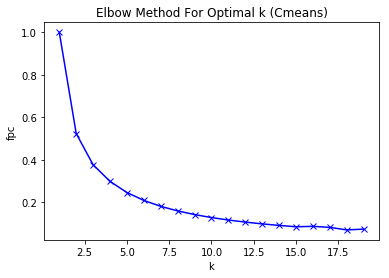

In [12]:
# calc best K 
Sum_of_squared_distances = []
K = range(1,20)
data =np.transpose(np.array(catMatrix))
for k in K:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data,k, 2, error=0.001, maxiter=900000, init=None)
    
    Sum_of_squared_distances.append(fpc)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('fpc')
plt.title('Elbow Method For Optimal k (Cmeans)')
plt.show()

In [13]:
nbCluster = 5

In [14]:
from sklearn.cluster import AffinityPropagation
import numpy as np
clustering = AffinityPropagation().fit(np.array(catMatrix))
# print(clustering) 

print(clustering.labels_)

import collections
collections.Counter(clustering.labels_ )

# print(clustering.cluster_centers_)

[ 1 36 34 13 18  3 16 12 41 25 17  2 39  1 28 25 28  0 28 16 22 22 28 16
 42 28  6 11  5 13 26 45  2 13  1  2 32 26 34 36  9  3 16  7  4 10 39 28
  8  5 37  3  0 36 42 13 35 22 34  8 18 31 36 20 33  6 39 39 45 42  4 16
 28 41 34 32 22 13 21  8 13 39 26 22 16 34  7 22  9  8  3 16 39 28  9  6
 35 36 28  7 22 13 22 10 28 15 18 39 25 36 28 41 44 20 41 40 14 38 28 28
 26 32  0 35  9 26 14  9 37 28  8 26 32 13  1 24  9 34 14  3 27 16 28 39
  3 39  3 13 12 28 39 28 40 42 40 44 28 15 22 11 39  0 15 12 28  2 42 22
 43 21 11 45 11 21 12 28  9 26 24 41 41 36 12 20 22 24 12 39 29  8 16 39
 11 39 28 35 35 38 28 28 13  8 31 37 26 41  1  6 27 15 43 28 16 13 11 13
 26 11 45 28  1 38 14 13 36  0 19 26 35 17 40 13 14 26  9 13 15 23  2 13
 15  9 28 10 38 16 35 37  5 36 36 41 22 28 22  7 28 25 14  5 16 28 22 41
 38 36 25  9  6  9 39 31  3  8 13 16 10 29 16 32 13 39 28  7 16 15 13 39
 32 18 36  9 41 28 13 24 26 10 13 22 42 20 26 18 27 28 17 16 13  1 28 28
 26 10 35  3 32 21 27 18 35  4 41 26  1 45  3 28  7

Counter({1: 14,
         36: 26,
         34: 17,
         13: 57,
         18: 12,
         3: 18,
         16: 22,
         12: 11,
         41: 24,
         25: 8,
         17: 5,
         2: 10,
         39: 40,
         28: 67,
         0: 10,
         22: 25,
         42: 13,
         6: 9,
         11: 12,
         5: 12,
         26: 27,
         45: 12,
         32: 14,
         9: 22,
         7: 10,
         4: 4,
         10: 15,
         8: 11,
         37: 7,
         35: 17,
         31: 5,
         20: 10,
         33: 4,
         21: 9,
         15: 13,
         44: 4,
         40: 10,
         14: 11,
         38: 14,
         24: 5,
         27: 8,
         43: 5,
         29: 10,
         19: 3,
         23: 8,
         30: 1})

In [15]:
kmeans = KMeans(n_clusters=nbCluster, random_state=0).fit(np.array(catMatrix))
print( kmeans.labels_ )
print(kmeans.inertia_)
import collections
collections.Counter(kmeans.labels_ )


[3 0 1 1 0 0 0 1 2 3 1 3 0 2 1 3 1 3 1 0 4 4 1 0 2 1 3 4 3 1 1 0 2 1 3 1 0
 1 1 0 4 0 2 2 3 0 0 1 2 3 4 0 3 0 2 1 4 4 1 0 2 0 0 0 3 3 0 0 0 2 3 0 1 2
 1 2 4 1 2 0 1 0 1 4 0 0 2 4 4 0 0 0 0 1 4 3 4 0 1 2 4 1 4 0 1 0 0 0 3 0 1
 2 2 0 2 2 3 1 1 1 1 0 3 4 4 1 3 0 3 1 2 1 3 1 3 2 4 3 2 0 3 0 1 0 0 0 0 1
 1 1 0 1 2 2 2 2 1 2 4 2 0 3 2 1 1 1 2 4 4 3 2 0 2 2 1 1 4 0 2 2 2 0 1 0 4
 2 1 0 3 0 0 0 4 0 1 4 4 1 1 4 1 3 4 4 0 2 3 3 3 0 4 1 0 1 4 1 1 4 0 1 3 1
 2 1 0 3 3 1 4 1 2 1 3 1 4 1 0 0 1 1 2 4 1 0 1 0 4 4 3 0 0 2 4 1 4 3 1 3 3
 3 0 3 4 2 1 0 3 4 3 4 0 0 0 3 1 3 0 1 0 2 1 0 1 2 4 0 1 0 2 1 0 4 2 1 1 0
 0 0 1 4 2 0 1 1 3 1 1 3 1 3 1 1 1 0 4 0 0 2 3 0 4 3 2 1 3 2 0 1 2 1 2 3 1
 0 3 4 3 0 3 0 3 1 2 0 1 4 3 3 3 0 3 4 1 0 1 3 1 1 4 3 2 1 1 2 0 0 0 2 0 4
 0 3 1 0 3 4 0 1 0 1 0 0 0 4 3 2 1 1 0 3 1 2 3 3 3 0 0 0 2 0 2 1 2 2 1 1 1
 1 0 2 3 0 2 2 0 1 1 1 1 4 0 1 1 4 4 4 1 1 3 1 1 4 1 1 2 3 1 0 4 0 1 1 0 3
 3 0 0 0 0 1 1 1 2 3 0 0 3 0 2 1 1 3 4 0 2 1 3 1 2 2 1 1 1 0 1 2 3 4 1 1 1
 3 4 2 2 4 0 2 2 3 2 3 4 

Counter({3: 102, 0: 180, 1: 202, 2: 102, 4: 85})

In [16]:

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    np.transpose(np.array(catMatrix)),nbCluster, 2, error=0.005, maxiter=1000, init=None)
print(cntr,u)

[[3.53427664 3.50096792 3.01713758 3.12644457 3.50702986 3.39165952
  3.59240082 3.73771251 3.70698544 3.5909313  2.95119352 3.43162943
  3.45700091 0.9471087  2.31253627 3.37645903 2.7733862  2.20820032
  1.09302344]
 [3.53475795 3.50134835 3.0189428  3.12771154 3.50736048 3.3923456
  3.59274923 3.7380498  3.70717391 3.59124852 2.95212254 3.43211461
  3.45739775 0.94724177 2.31583971 3.37782933 2.77499466 2.21091725
  1.09304693]
 [3.6598411  3.58172236 3.66832009 3.58562305 3.66249395 3.68736754
  3.72012776 3.8350025  3.84006855 3.69198339 3.43514742 3.79188515
  3.57405018 3.44768835 3.41073782 3.83676967 3.56677711 3.47148227
  3.56198424]
 [3.54011043 3.50558253 3.03906804 3.14182865 3.5110216  3.39994932
  3.59663676 3.74180106 3.70924525 3.594768   2.96254201 3.43750943
  3.46183141 0.94816217 2.35280931 3.39304523 2.79305879 2.24132237
  1.09266164]
 [3.53472026 3.50131856 3.01880142 3.12761232 3.5073346  3.39229189
  3.59272195 3.73802339 3.70715917 3.59122369 2.95204975 3.43

In [17]:
import matplotlib.pyplot as plt

# (kmeans.cluster_centers_)
def scatter_plot(clusters,title):
  fig = plt.figure(figsize=(18, 5), dpi= 80)
  for c in clusters :
    x = ['Adventure', 'Action', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'Documentary', 'IMAX', 'War', 'Musical', 'Western', 'Film-Noir']
    y = c
    plt.scatter(x,y, s=80)
  plt.title(title,color='black',size='large')
  plt.grid()
  plt.show()



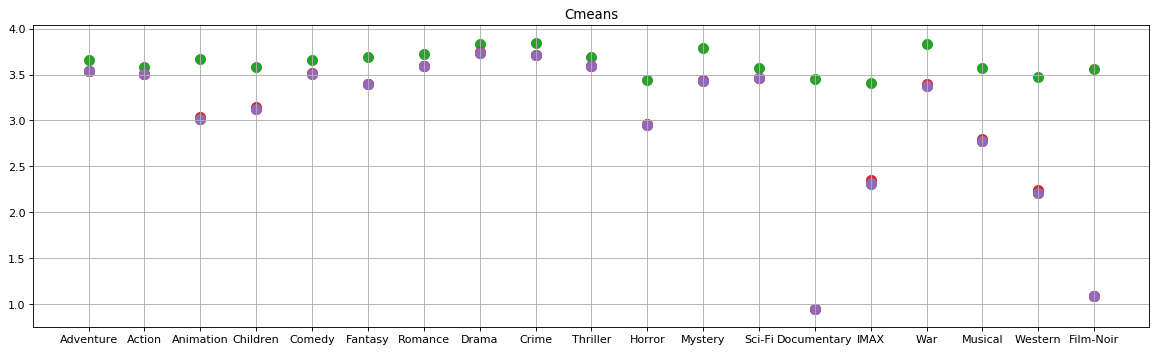

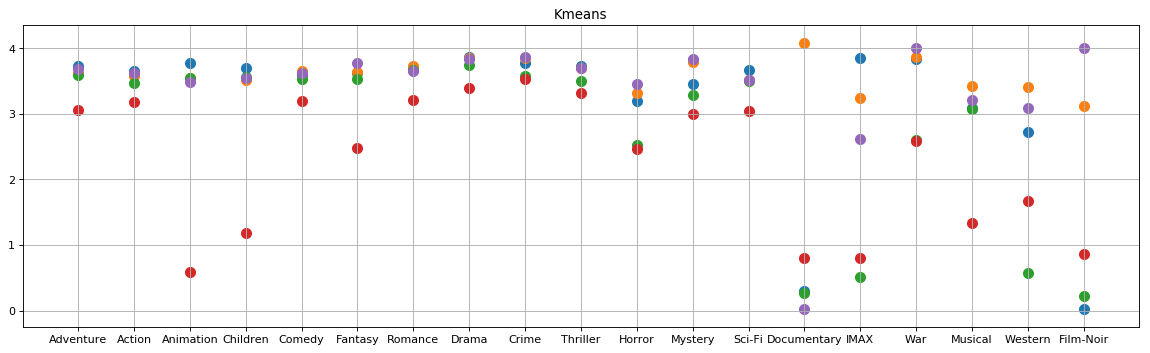

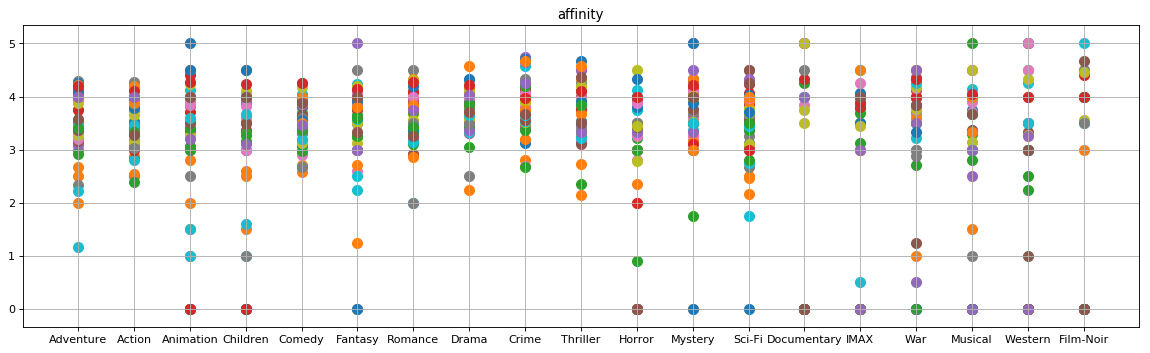

In [18]:
scatter_plot(cntr , title="Cmeans")
scatter_plot(kmeans.cluster_centers_,title="Kmeans")
scatter_plot(clustering.cluster_centers_,title="affinity")

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection


def radar_factory(num_vars, frame='circle'):
  
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    def draw_poly_patch(self):
        # rotate theta such that the first axis is at the top
        verts = unit_poly_verts(theta + np.pi / 2)
        return plt.Polygon(verts, closed=True, edgecolor='k')

    def draw_circle_patch(self):
        # unit circle centered on (0.5, 0.5)
        return plt.Circle((0.5, 0.5), 0.5)

    patch_dict = {'polygon': draw_poly_patch, 'circle': draw_circle_patch}
    if frame not in patch_dict:
        raise ValueError('unknown value for `frame`: %s' % frame)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1
        # define draw_frame method
        draw_patch = patch_dict[frame]

        def __init__(self, *args, **kwargs):
            super(RadarAxes, self).__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, **kwargs):
            """Override fill so that line is closed by default"""
            closed = kwargs.pop('closed', True)
            return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            return self.draw_patch()

        def _gen_axes_spines(self):
            if frame == 'circle':
                return PolarAxes._gen_axes_spines(self)
            # The following is a hack to get the spines (i.e. the axes frame)
            # to draw correctly for a polygon frame.

            # spine_type must be 'left', 'right', 'top', 'bottom', or `circle`.
            spine_type = 'circle'
            verts = unit_poly_verts(theta + np.pi / 2)
            # close off polygon by repeating first vertex
            verts.append(verts[0])
            path = Path(verts)

            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}

    register_projection(RadarAxes)
    return theta


def unit_poly_verts(theta):
 
    x0, y0, r = [0.5] * 3
    verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
    return verts


def example_data(clusters):

    data = [
        ['Adventure', 'Action', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'Documentary', 'IMAX', 'War', 'Musical', 'Western', 'Film-Noir']
    ]
    
    
    i  = 1
#     data.append(("profils" ,clusters))
    for c in clusters:
      data.append(("Profil " + str(i) ,[c]))
      i = i +1
    return data




In [20]:
def radar_clusters(viz_title,clusters,rows=2,cols=3):
  N = 19
  theta = radar_factory(N, frame='polygon')

  data = example_data(clusters)
  #     cntr
  # kmeans.cluster_centers_
  spoke_labels = data.pop(0)

  fig, axes = plt.subplots(figsize=(17, 17), nrows=rows, ncols=cols,
                           subplot_kw=dict(projection='radar'))
  fig.subplots_adjust(wspace=0.4, hspace=0.4, top=0.5, bottom=0.05)

  colors = ['b', 'r', 'g', 'm', 'y']

  for ax, (title, case_data) in zip(axes.flatten(), data):

      ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                   horizontalalignment='center', verticalalignment='center')
      
      for d, color in zip(case_data, colors):
          ax.plot(theta, d, color=color)
          ax.fill(theta, d, facecolor=color, alpha=0.25)
      ax.set_varlabels(spoke_labels)

  plt.show()

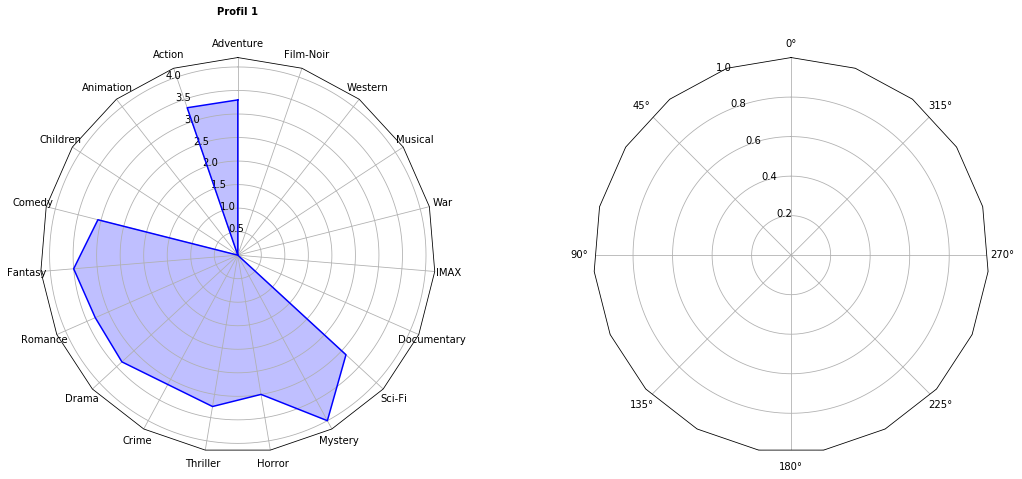

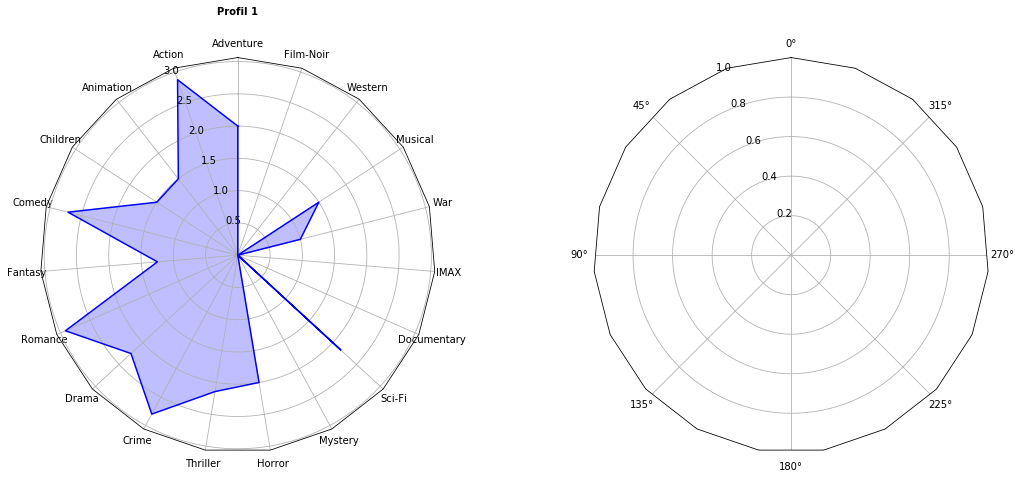

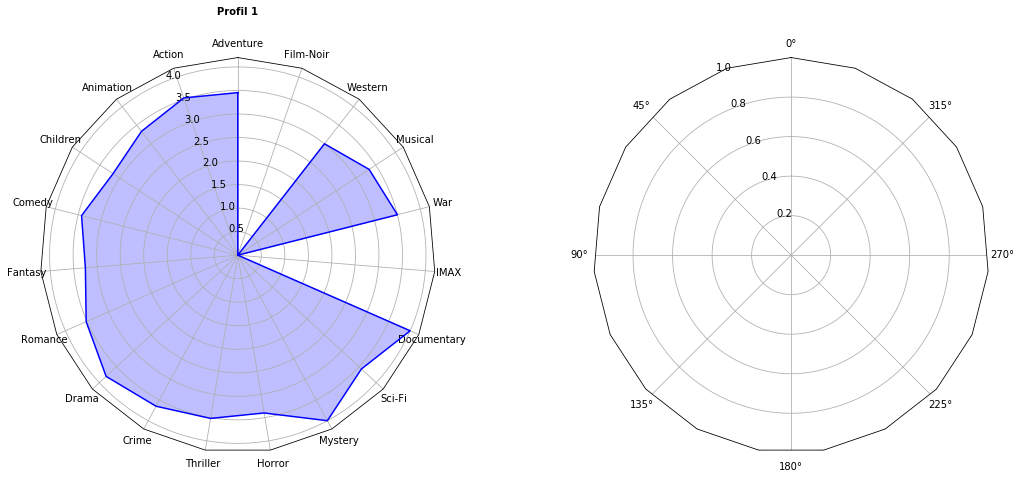

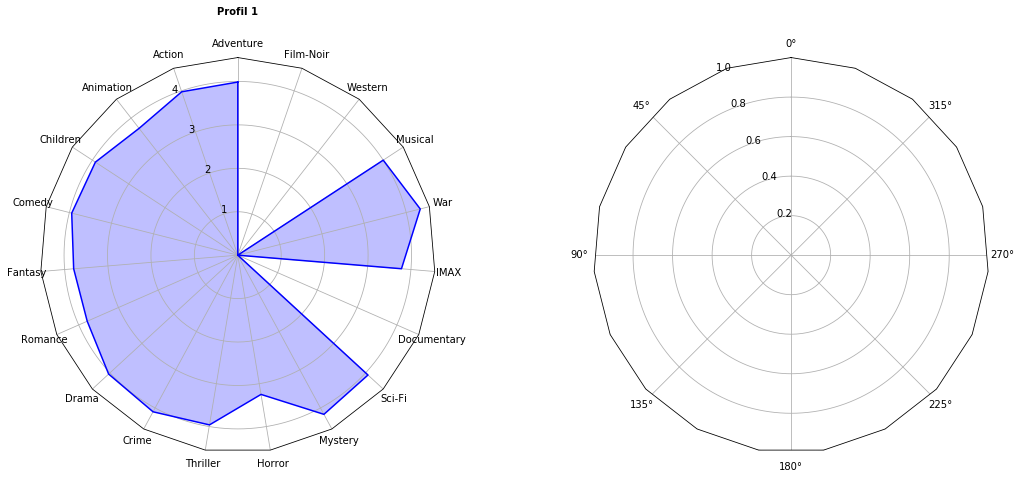

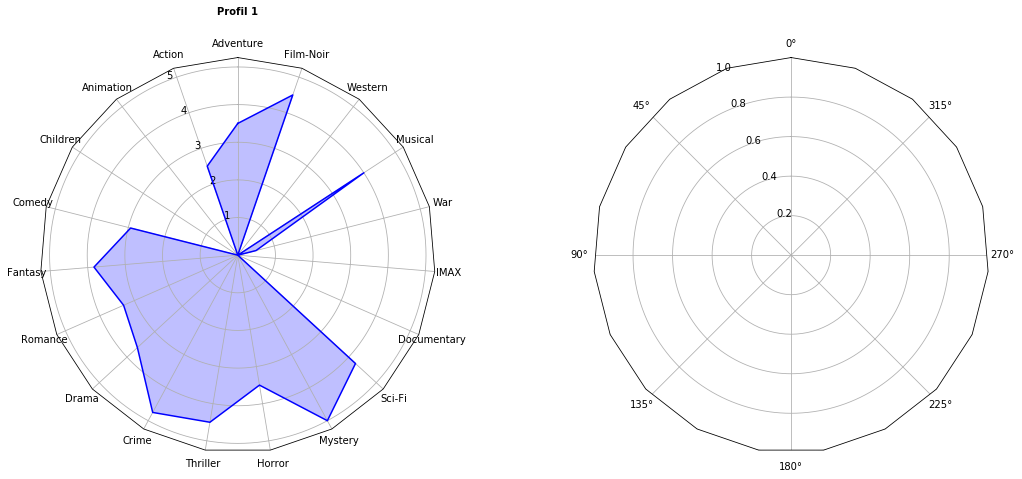

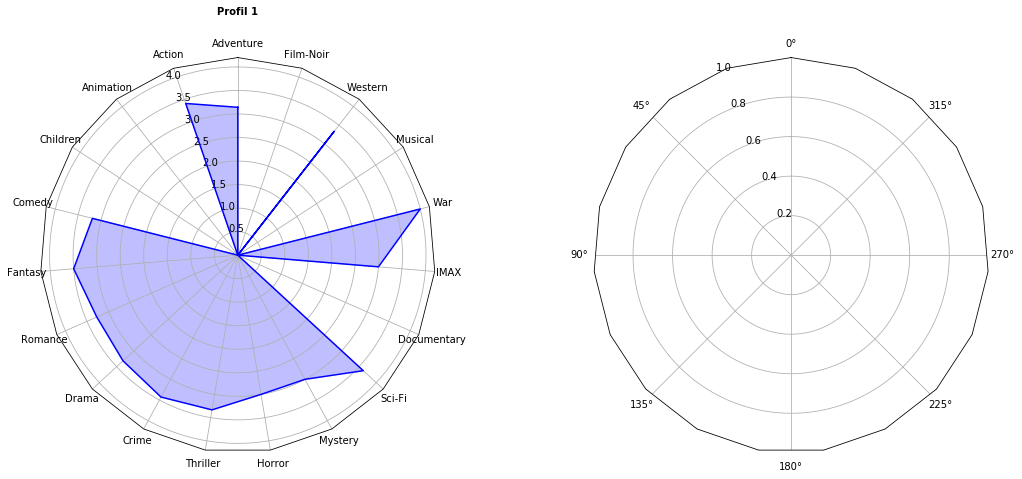

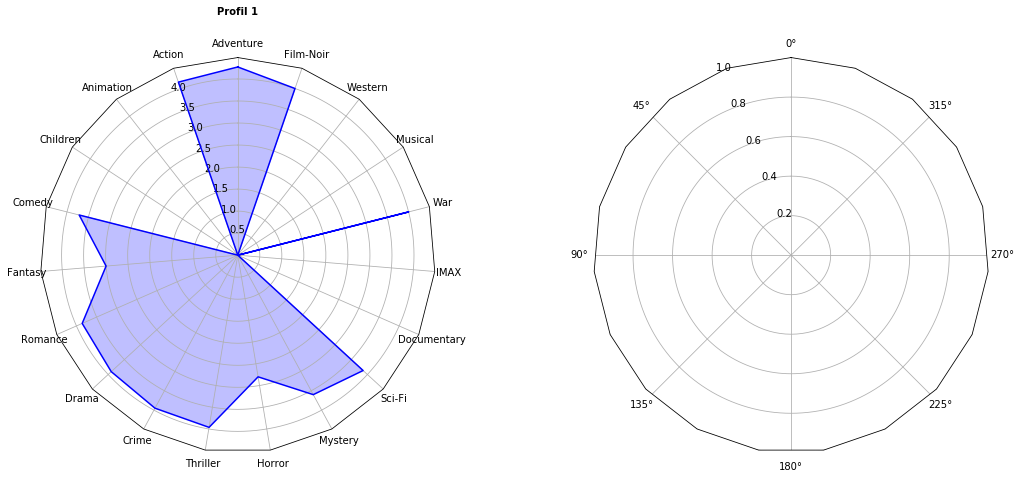

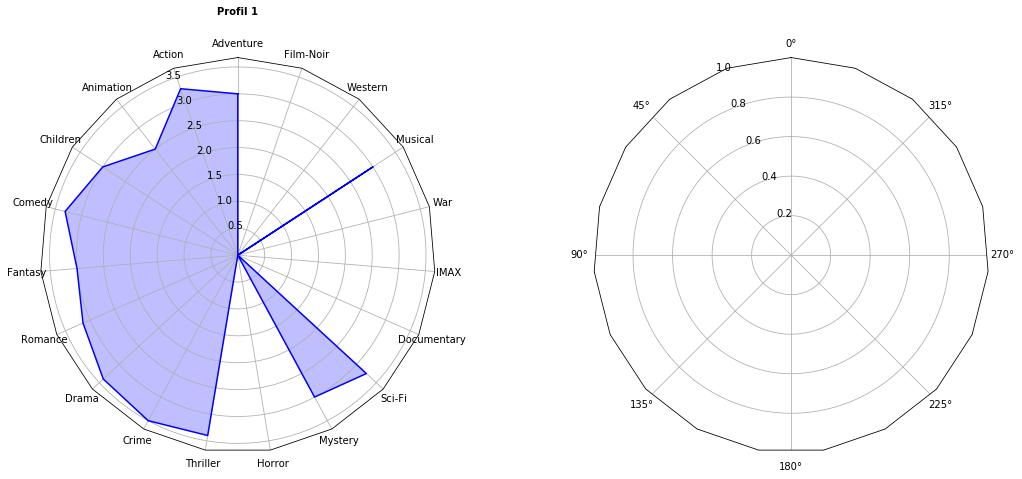

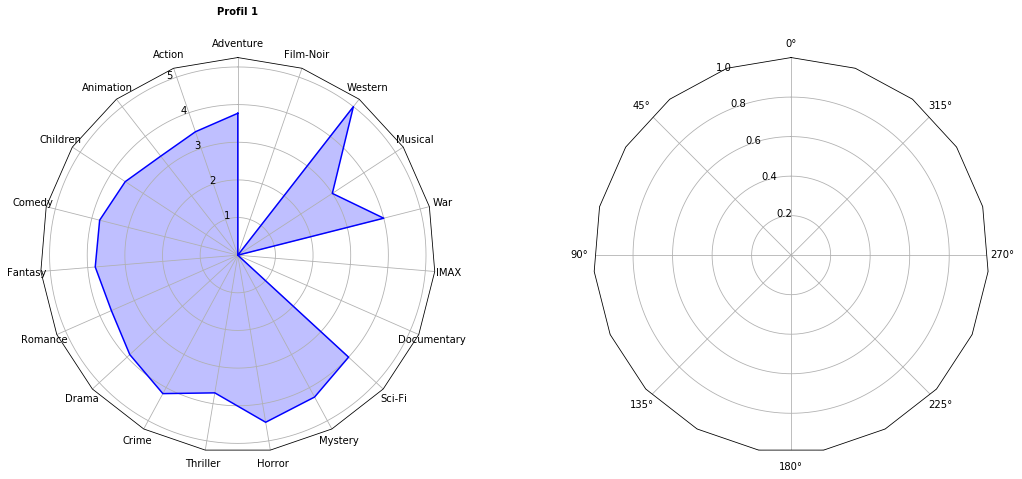

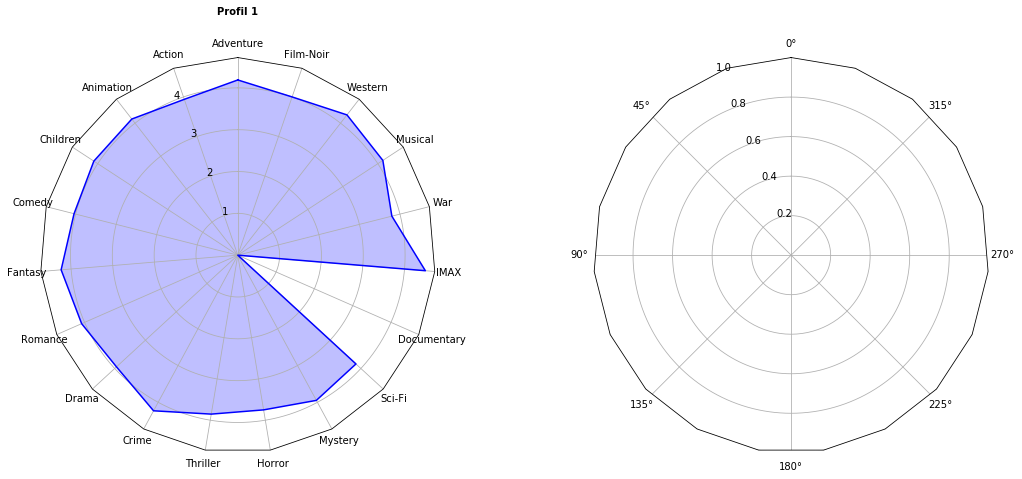

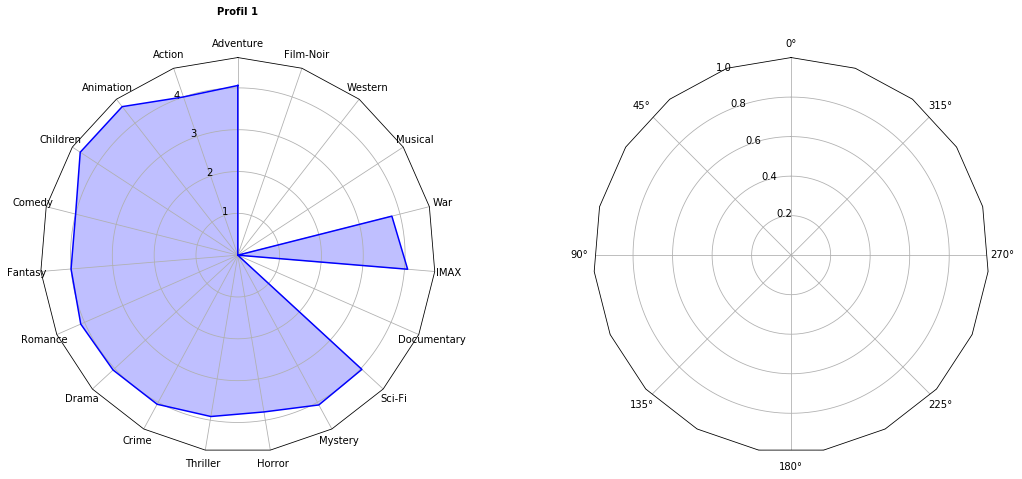

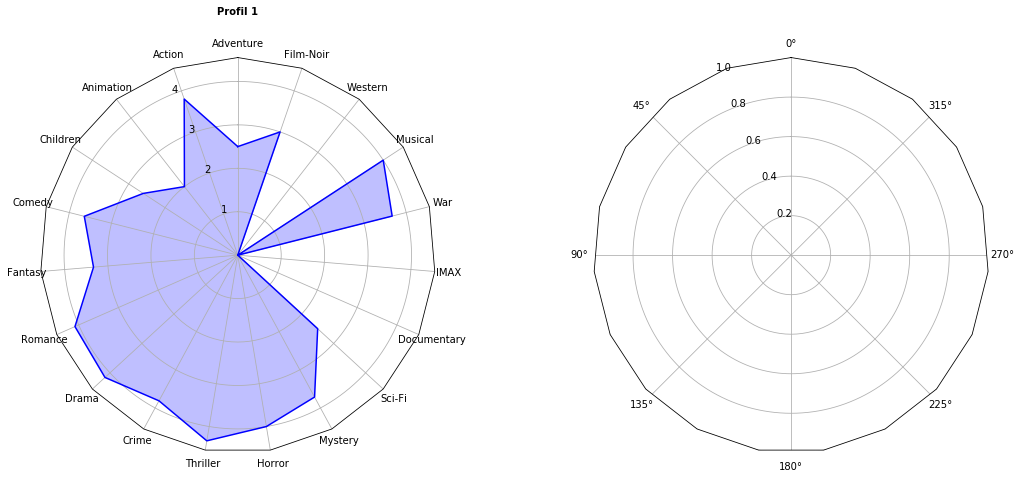

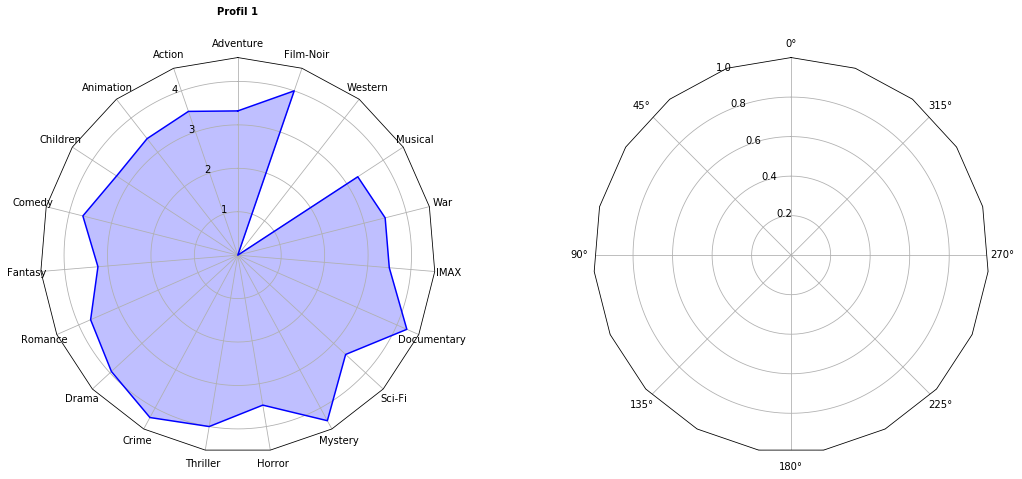

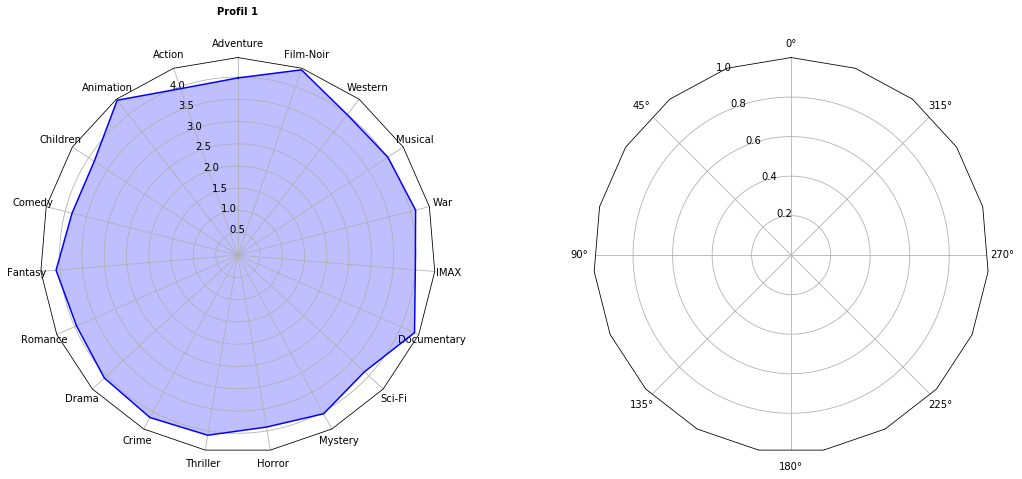

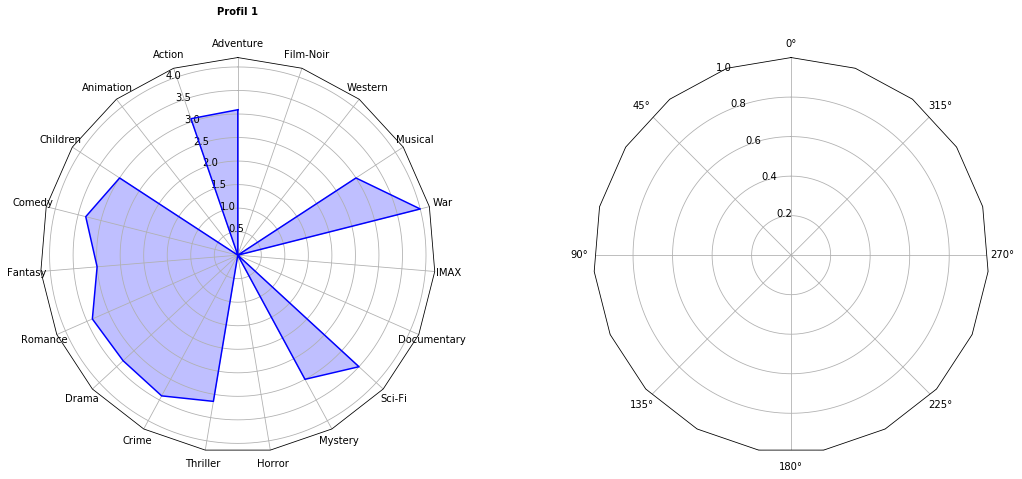

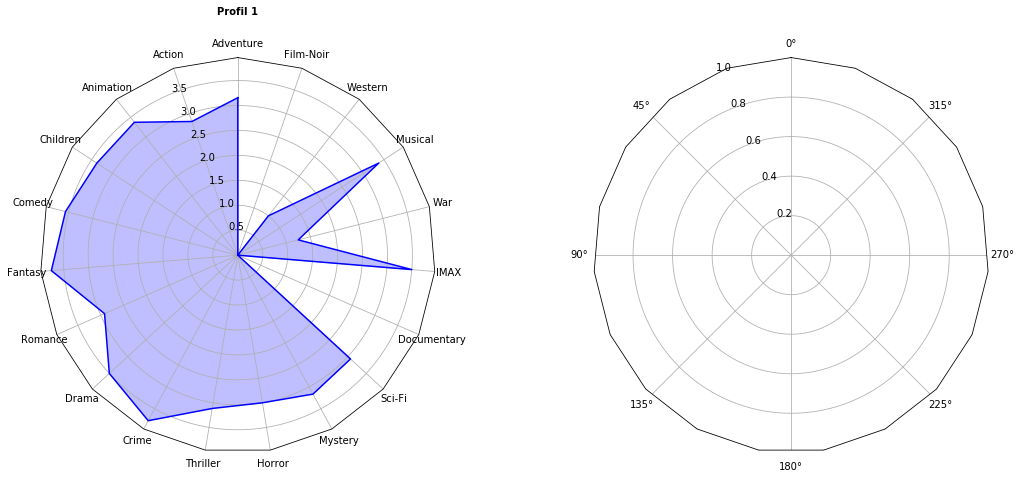

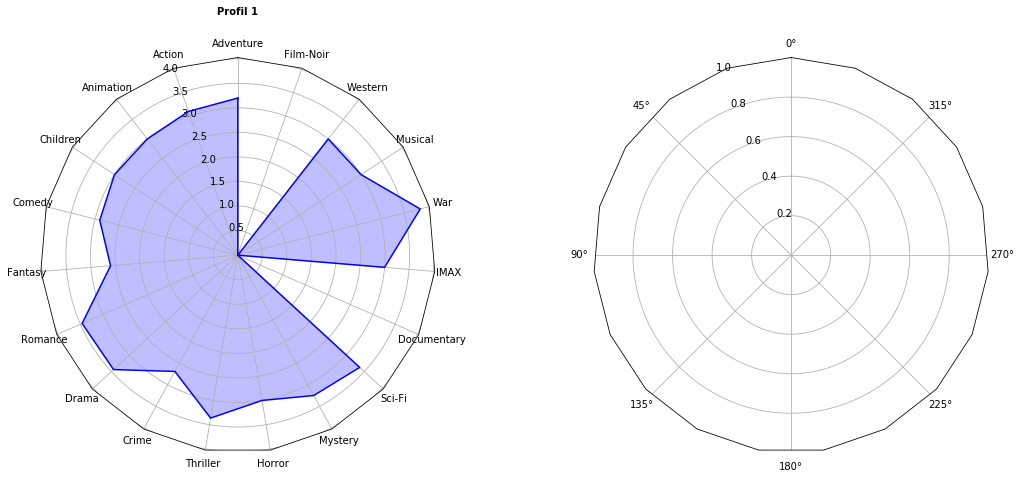

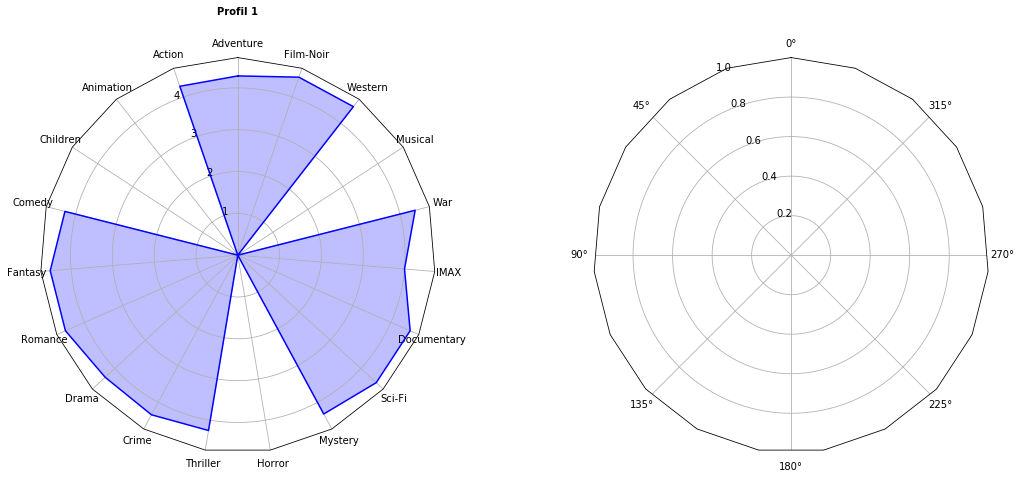

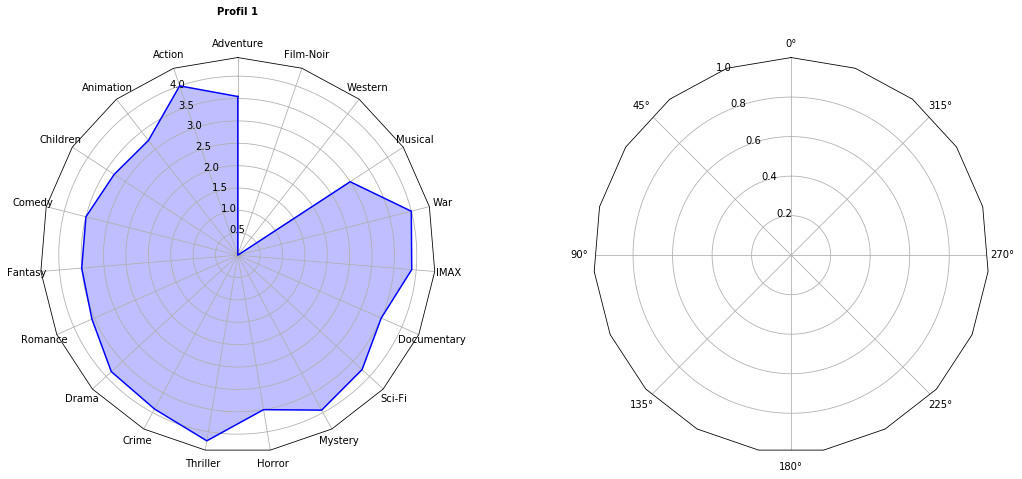

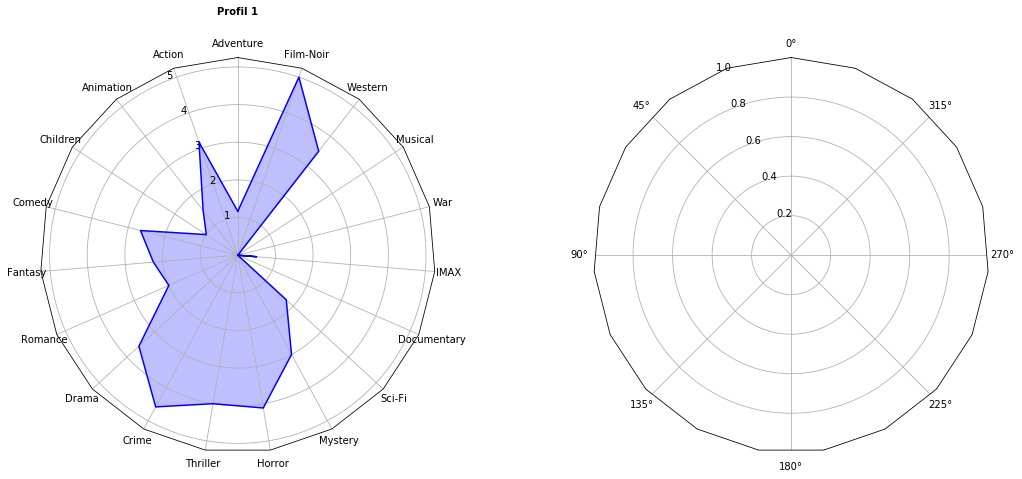

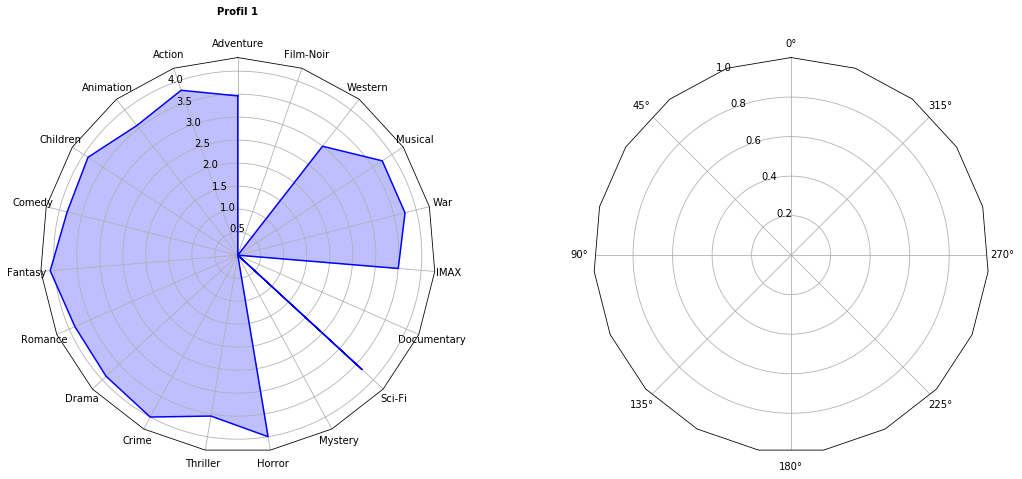

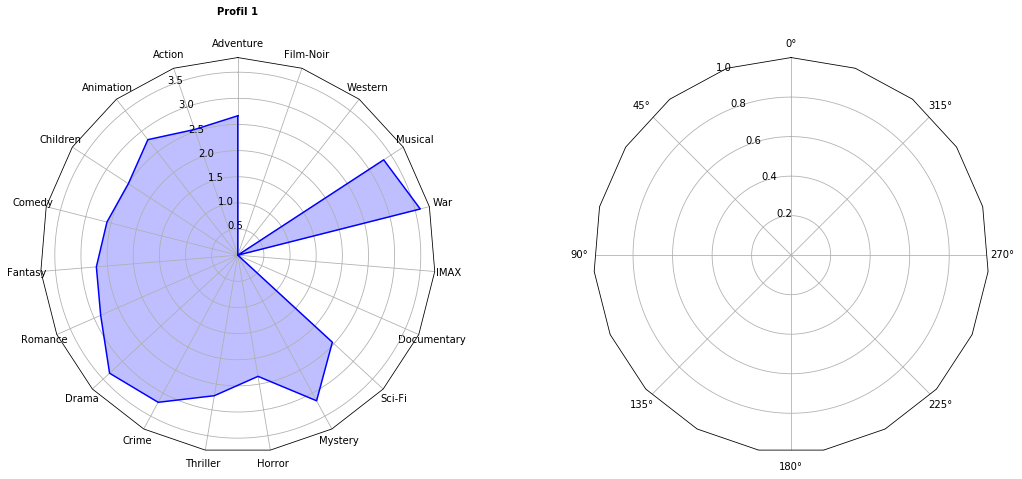

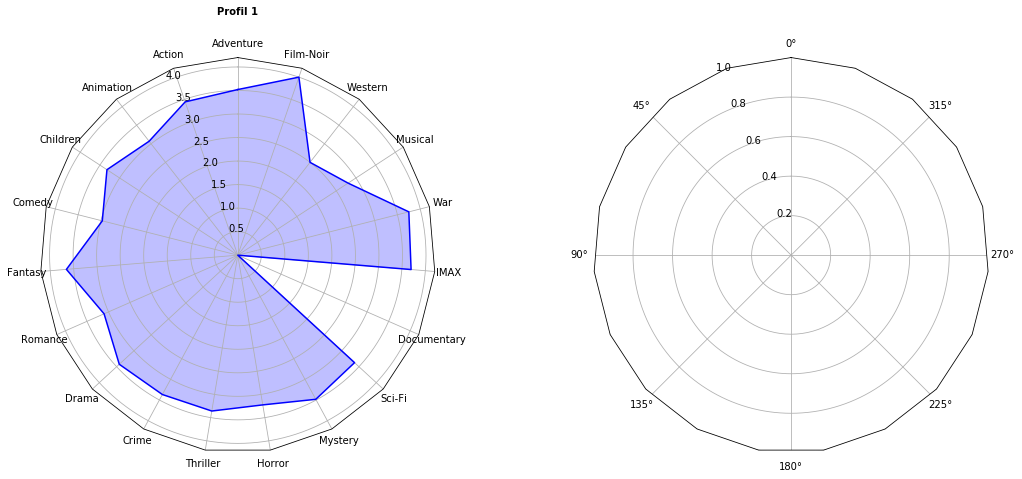

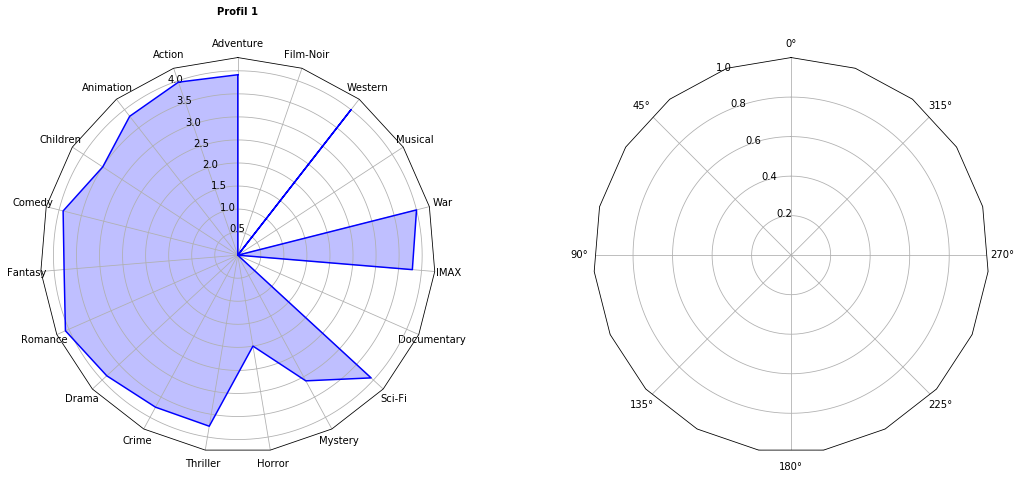

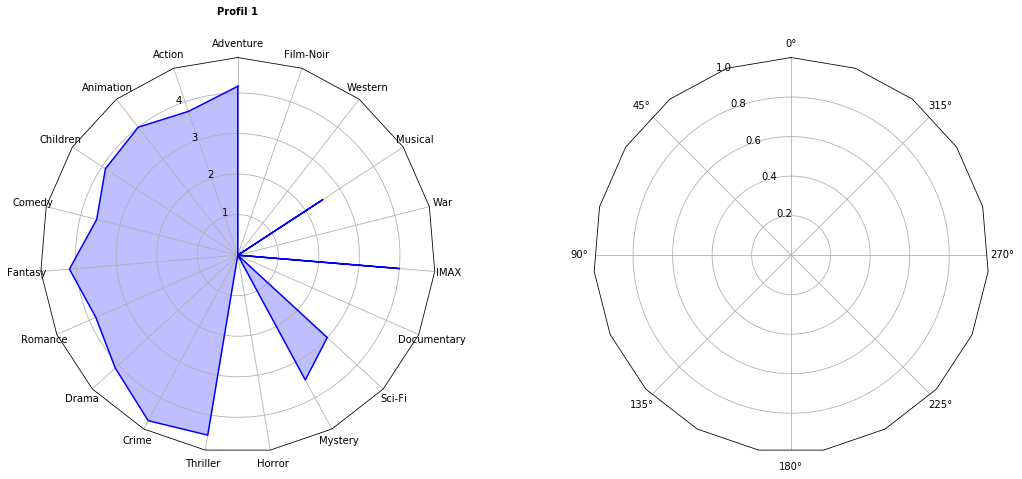

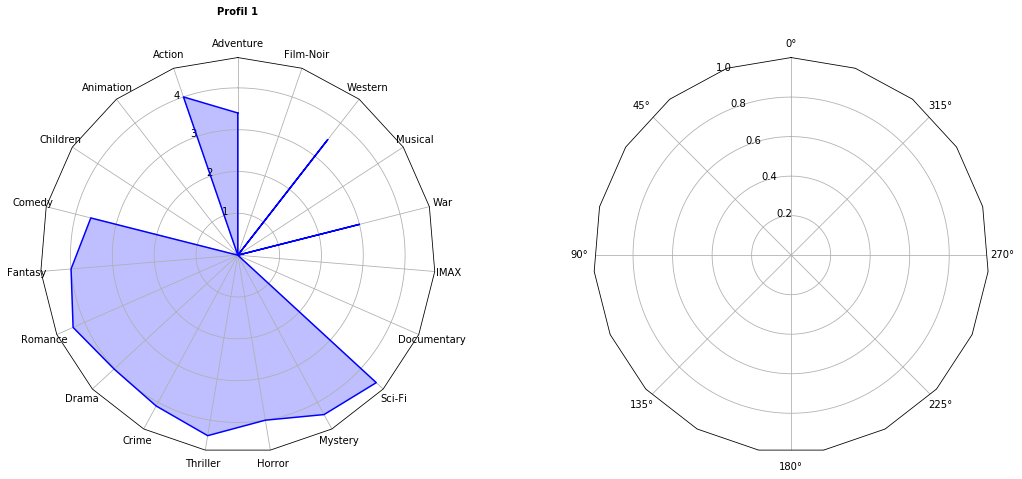

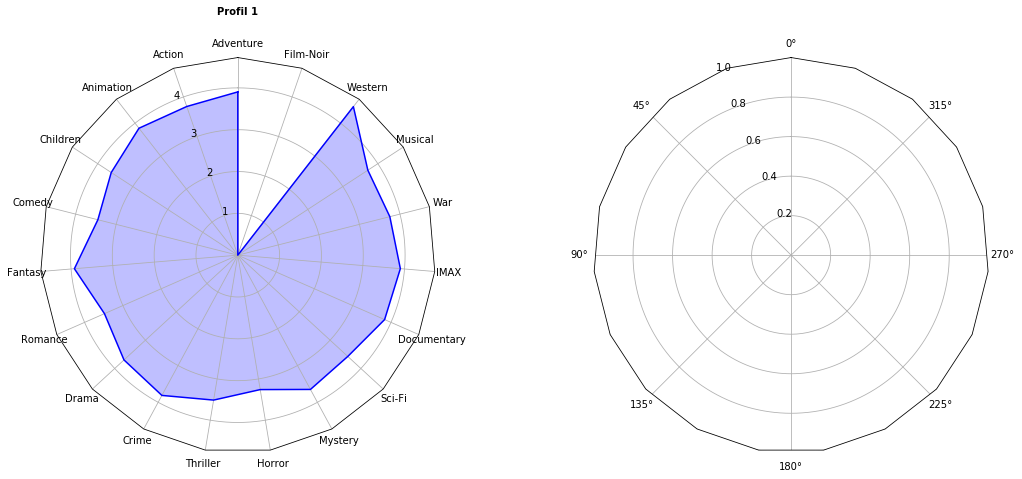

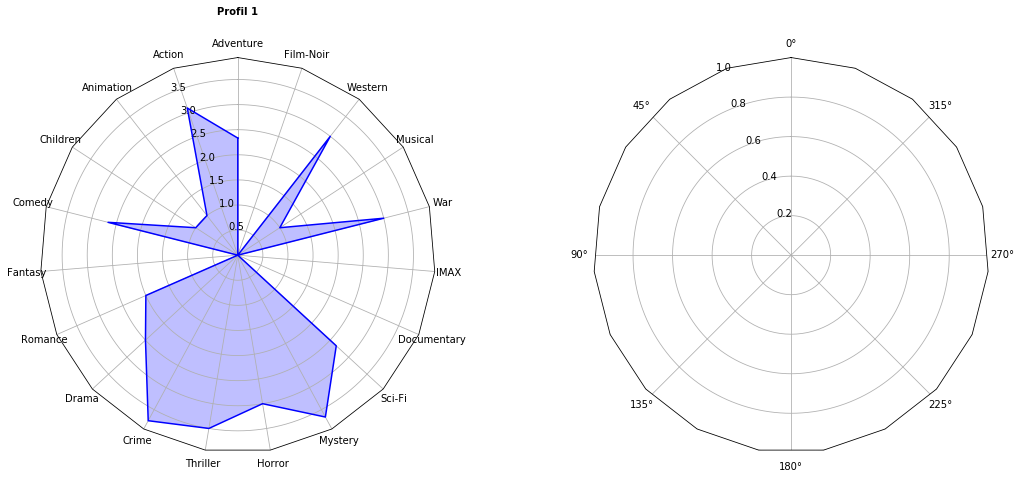

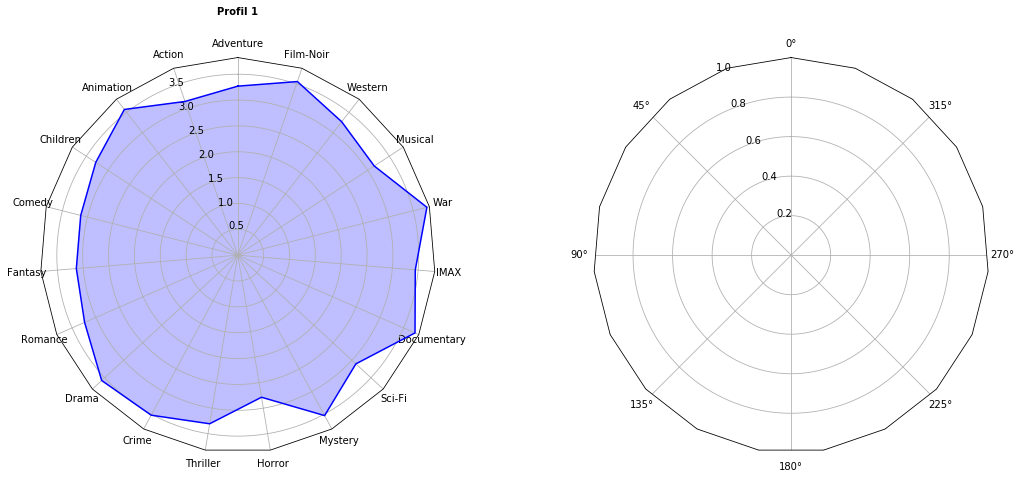

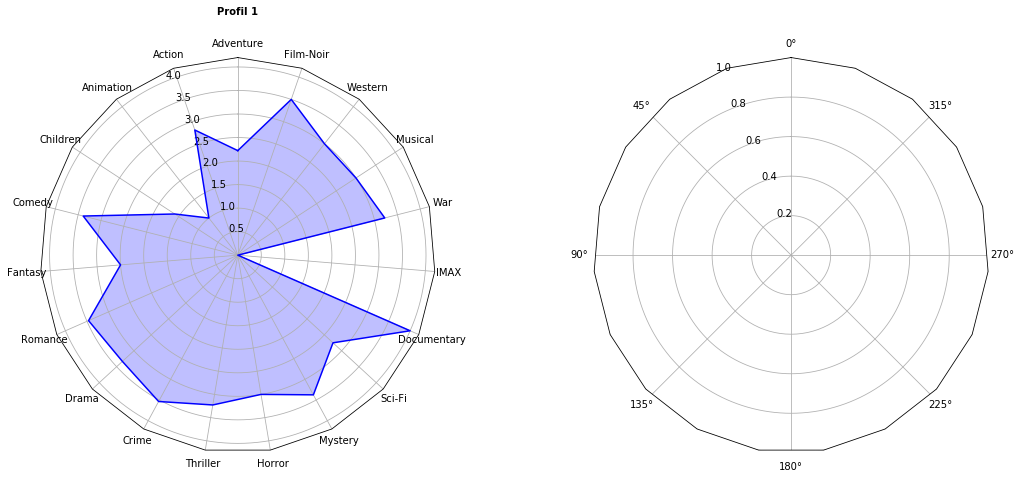

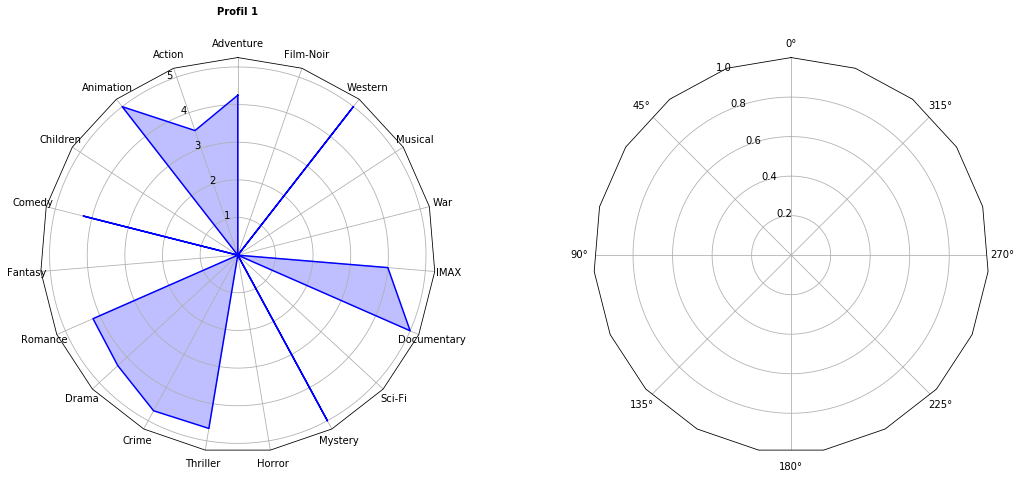

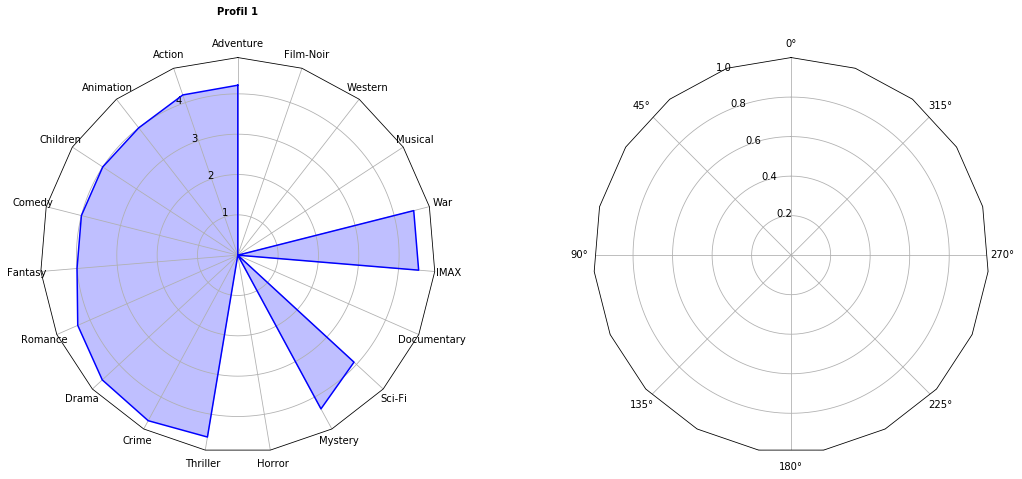

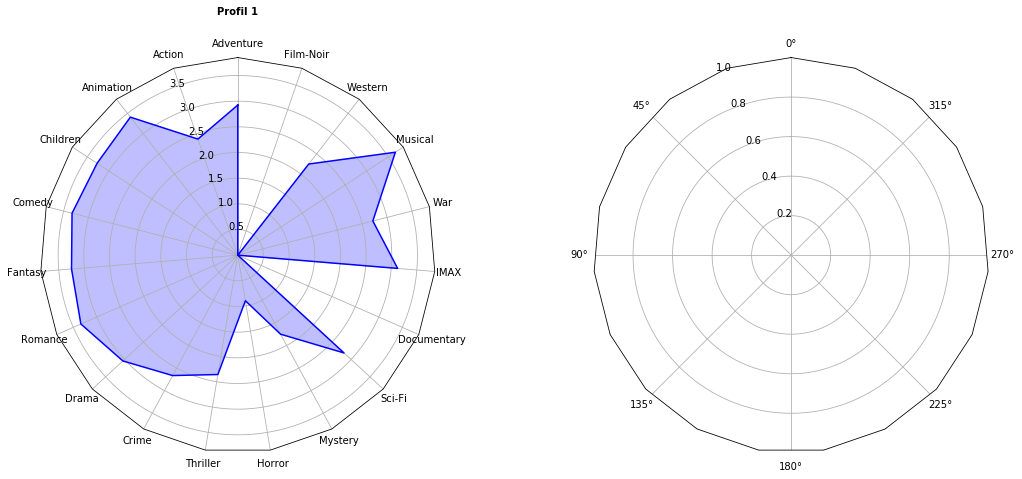

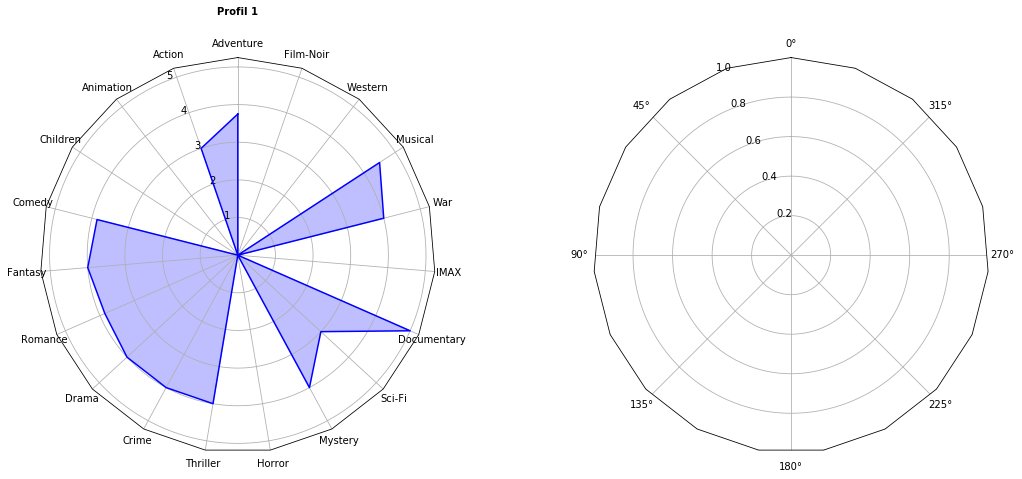

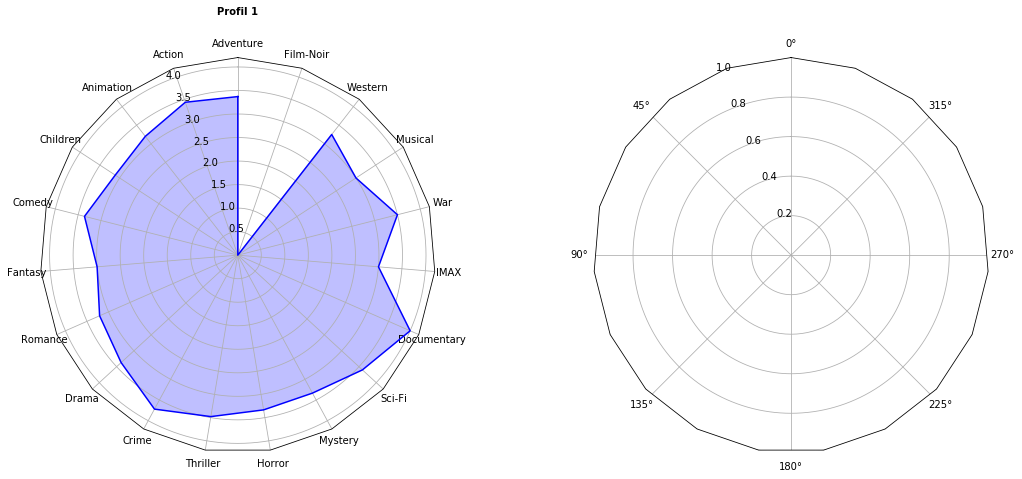

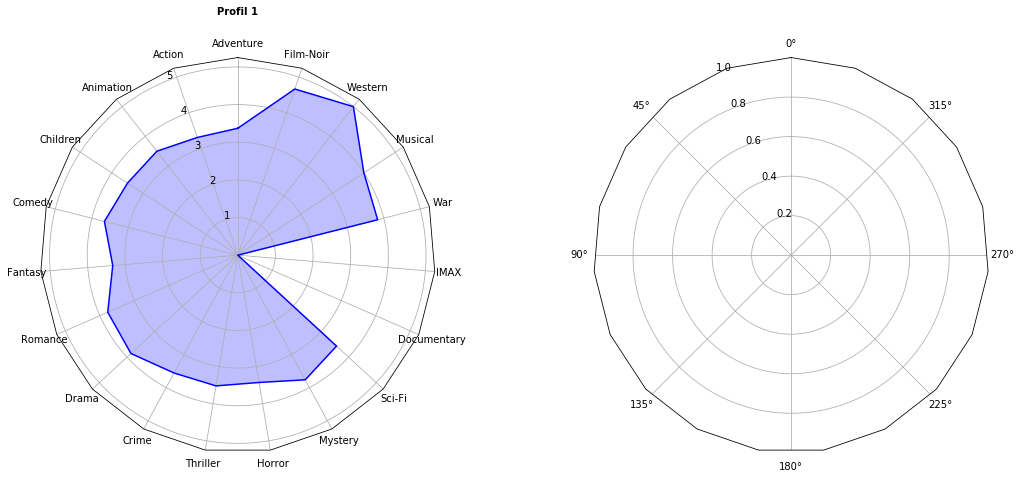

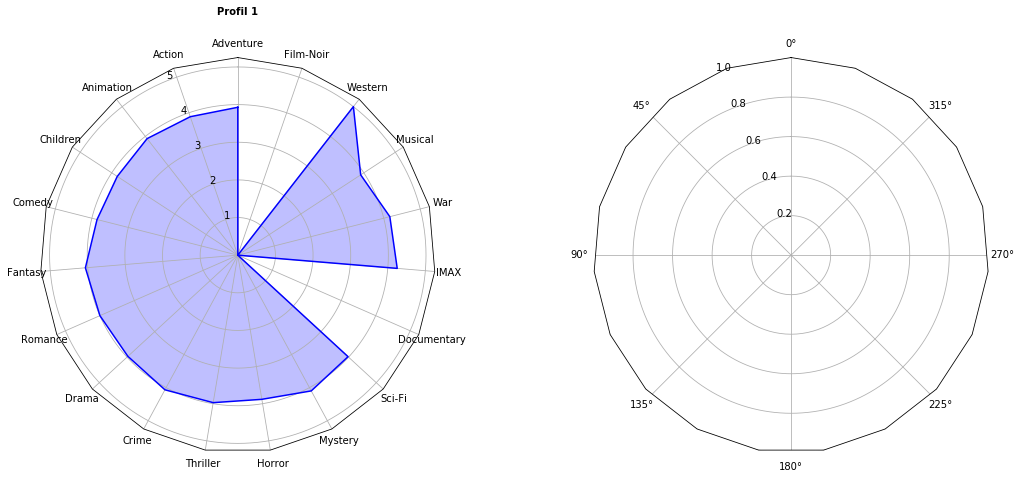

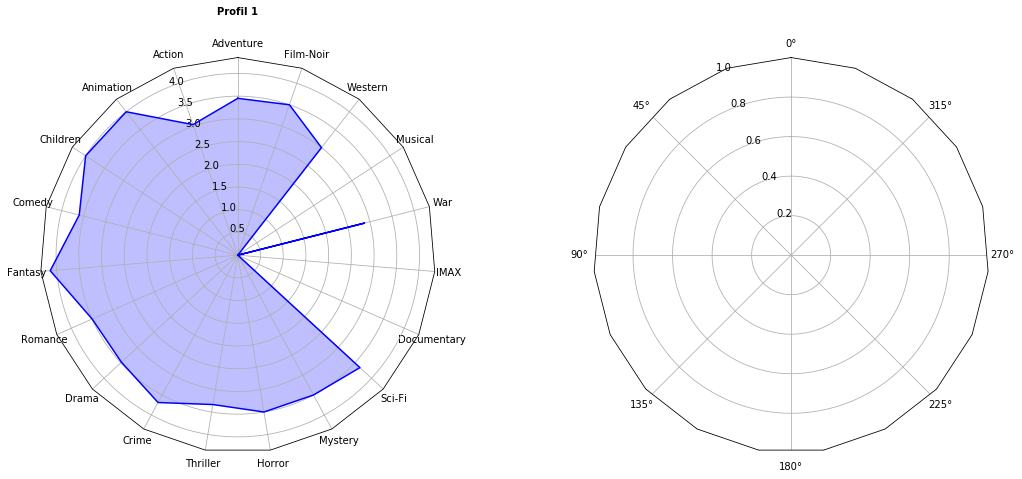

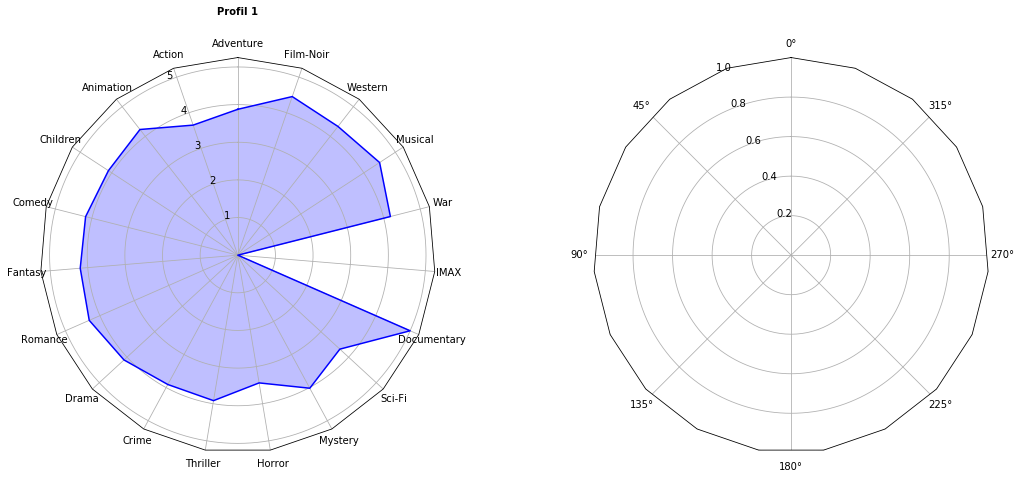

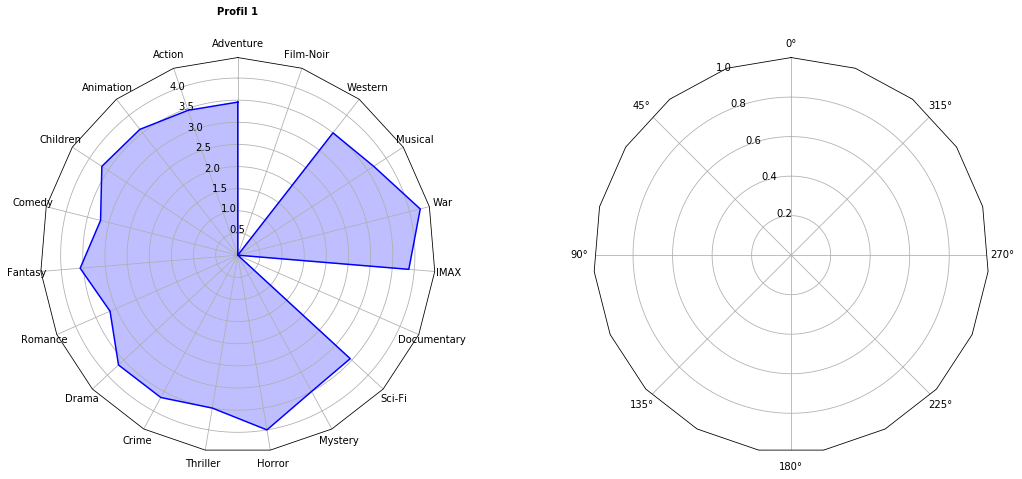

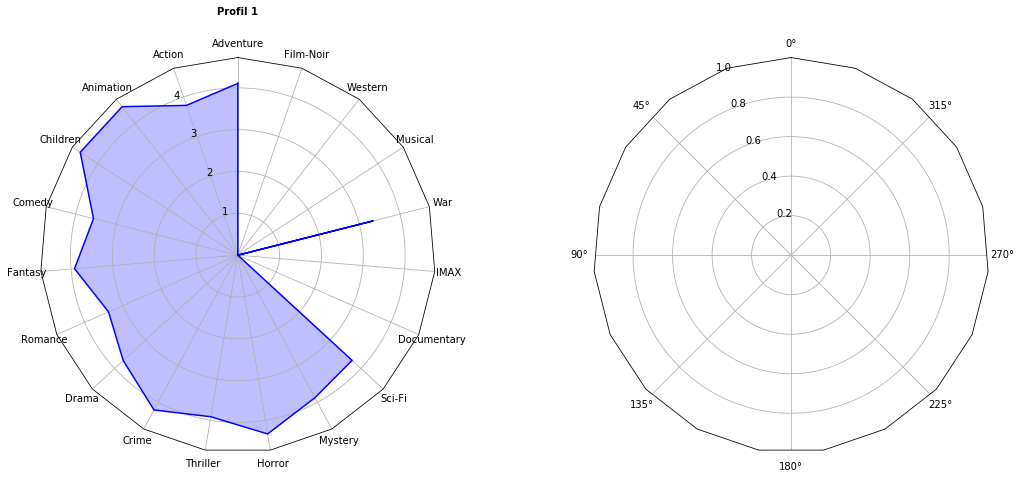

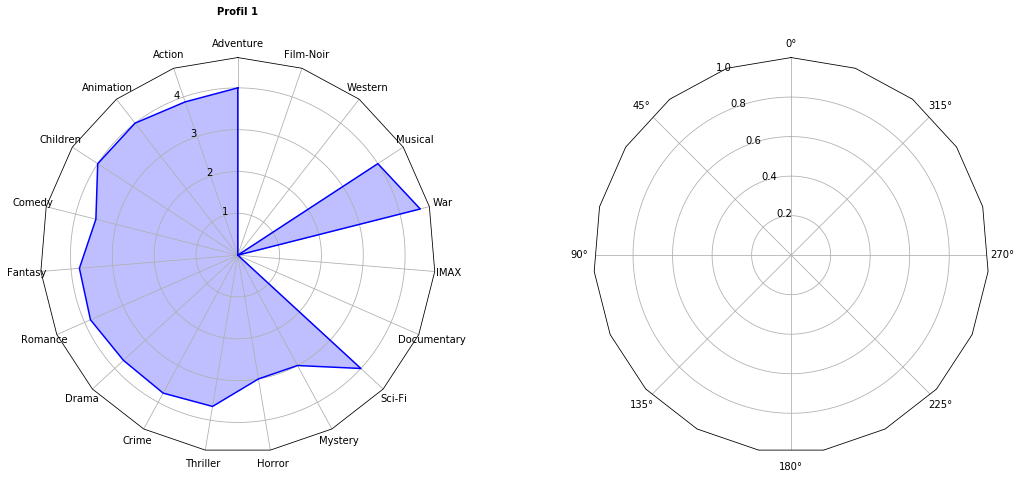

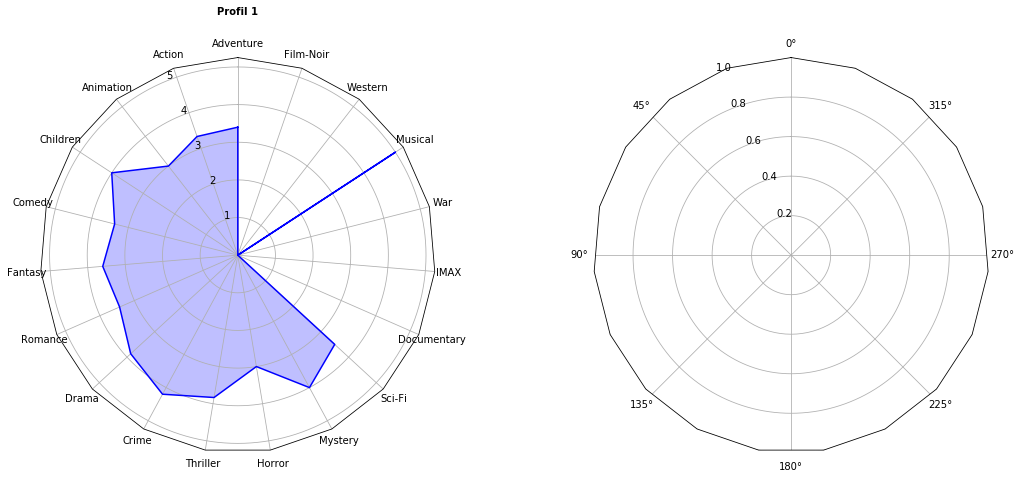

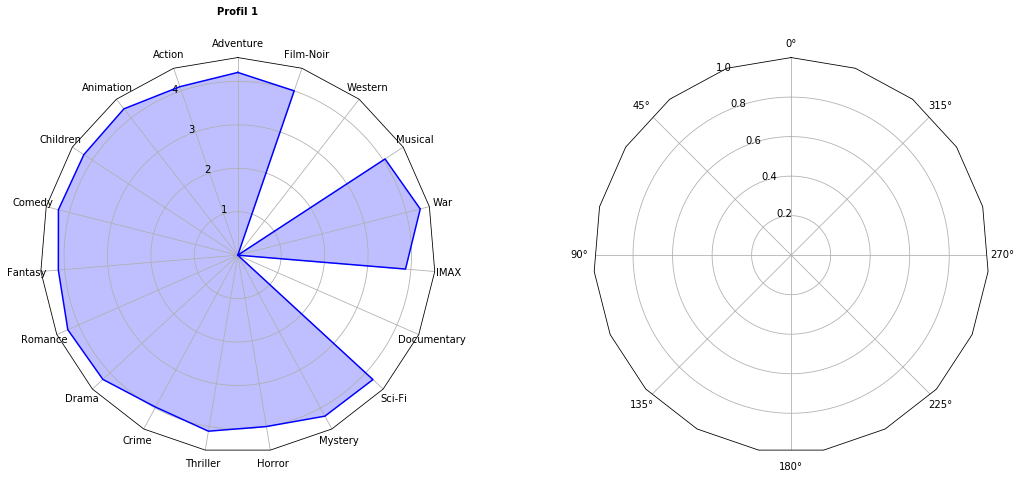

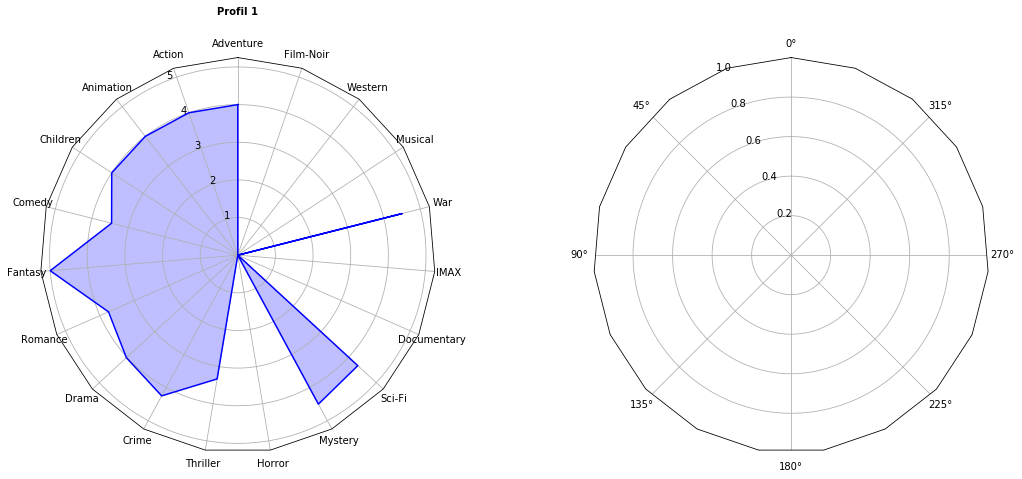

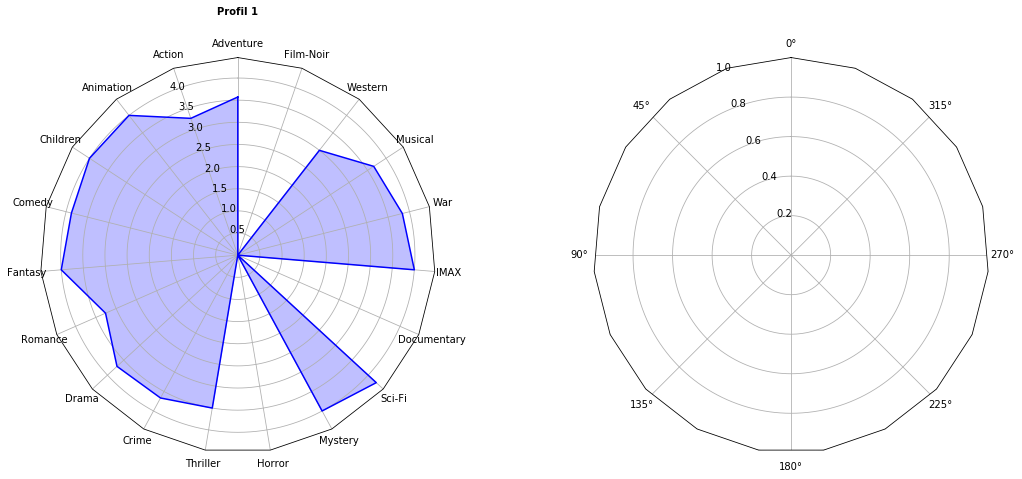

In [29]:

for c in clustering.cluster_centers_ :
    radar_clusters("afinity",[c],rows=1, cols=2)

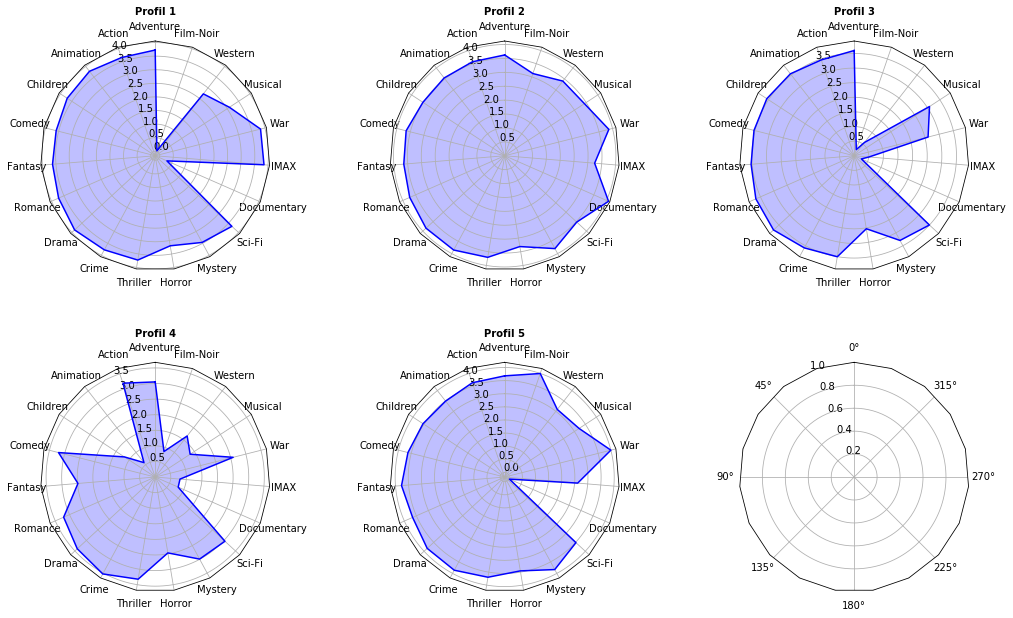

In [22]:
radar_clusters("Kmeans",kmeans.cluster_centers_)


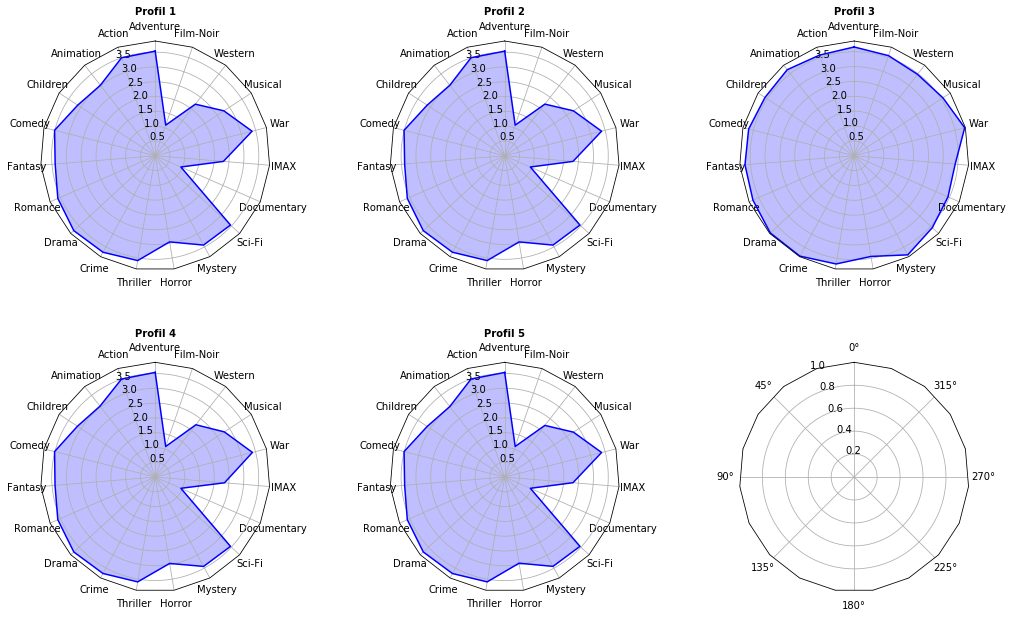

In [23]:
radar_clusters("Cmeans",cntr)

In [24]:
!pip install scikit-surprise
from surprise import AlgoBase
from surprise import Dataset
from surprise.model_selection import cross_validate

In [25]:
# getCluster(UserId)

#cas 1 sans cluster
class RecAlgo1(AlgoBase):

    def __init__(self):
        AlgoBase.__init__(self)
        self.verbose = True

        
    def fit(self, trainset):
        AlgoBase.fit(self, trainset)
        
        print(list(trainset.all_users()))
#         build the Ratmatrix
#         build the categoryMatrix
#         clusters
#         get clusters Mat

#         self.sim = self.compute_similarities()

        
        return self

    def estimate(self, u, i):
#       if not (self.trainset.knows_user(u) and self.trainset.knows_item(i)):
#             raise PredictionImpossible('User and/or item is unkown.')
          
#       neighbors = [(v, self.sim[u, v]) for (v, r) in self.trainset.ir[i]]
      
      # Sort these neighbors by similarity
#       neighbors = sorted(neighbors, key=lambda x: x[1], reverse=True)

#       print('The 3 nearest neighbors of user', str(u), 'are:')
#       for v, sim_uv in neighbors[:3]:
#           print('user {0:} with sim {1:1.2f}'.format(v, sim_uv))
      
      
#       print(self.sim)
      return 4
    
data = Dataset.load_builtin('ml-100k')
algo = RecAlgo1()

cross_validate(algo, data, verbose=True,cv=2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

{'test_rmse': array([1.22326612, 1.21652785]),
 'test_mae': array([0.89694, 0.89138]),
 'fit_time': (0.0, 0.01300811767578125),
 'test_time': (0.3178117275238037, 0.2928171157836914)}